# Examples

## Fitting with HD122563

In this notebook, we use ``LOTUS`` to analyse a well know metal poor star HD122563 to give user a complete process when handling with real metal poor stars with high resolution EW observations. Data come from [Frebel et al. 2013](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJ/769/57). For metal-poor star, we use ``exp_cutoff=2.7``, which means that FeI lines with excitation potential smaller than 2.7 ev will not be considered in the following analysis:

In [1]:
import os
import lotus_nlte
fp = os.path.dirname(os.path.realpath(lotus_nlte.__file__))
obs_path = fp + "/test/data/HD122563.csv"

In [2]:
from lotus_nlte.gcogs.multigcogs import PolyMultiGCOG
star = "HD122563"
stellar_type = "K/giant/very_metal_poor"
exp_cutoff = 2.7
cal = "nlte"
mgcog = PolyMultiGCOG(star=star, stellar_type=stellar_type, exp_cutoff=exp_cutoff, 
                      obs_path=obs_path,cal=cal)
mgcog.pipelines()

All optimizations are based on exist interpolated models and you don't need to interpolate them!
Hypersurface of line 3846.80A with ep=3.25ev of element FeI doesn't have enough points for interpolation
Hypersurface of line 4007.27A with ep=2.76ev of element FeI doesn't have enough points for interpolation
Hypersurface of line 4021.87A with ep=2.76ev of element FeI doesn't have enough points for interpolation
Hypersurface of line 4044.61A with ep=2.83ev of element FeI doesn't have enough points for interpolation
Hypersurface of line 4058.22A with ep=3.21ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 4062.44A with ep=2.85ev of element FeI doesn't have enough points for interpolation
Hypersurface of line 4067.98A with ep=3.21ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 4070.77A with ep=3.24ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 4073.76A with ep=3

Hypersurface of line 5232.94A with ep=2.94ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5242.49A with ep=3.63ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5263.31A with ep=3.27ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5266.56A with ep=3.00ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5281.79A with ep=3.04ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5283.62A with ep=3.24ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5302.30A with ep=3.28ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5324.18A with ep=3.21ev of element FeI has already existed and passes test of interpolation
Hypersurface of line 5339.93A with ep=3.27ev of element FeI has already existed and passes test 

### Optimization with proper outliers removal

In [3]:
from lotus_nlte.optimize import DiffEvoStellarOptimization
from lotus_nlte.utils import generate_ranges

In [4]:
# define boundary
bounds = [tuple(r) for r in generate_ranges(stellar_type)[:2]]
bounds.append((0.5, 3.0))

In [5]:
# define how many iterations for your optimization at most
start_attemp = 1
max_attemps = 3

**Removing outliers condition (when should we stop the iteration of optimization):** the goal of the code is to search the global mimum values and its corresponding stellar parameters. During this process, the abundance derived from certain lines will have large scattering from the rest of abundance. Therefore, people need to perform removing outliers for those scatterings which can lead to better result. In this loop, you can set up the condition that if objective function is smaller than a certain tolerence, then we don't need to perform any removing and stop the iteration before reaching the ``max_attemps``, this condition can be:
$$
   \mathcal{F} = \left(\frac{s_{\chi,1}}{\sigma_{\chi,1}}\right)^2 + \left(\frac{s_{REW,1}}{\sigma_{REW,1}}\right)^2 + \left(\frac{\bar{A_1} - \bar{A_2}}{\sigma_{1-2}}\right)^2 \leqslant tol
$$
$s_{\chi,1}$ is the slope between excitation potentials with derived abundance for FeI, $\sigma_{\chi,1}$ is its uncertainty; $s_{REW,1}$ is the slope between reduced EWs with derived abundance for FeI, $\sigma_{REW,1}$ is its uncertainty. $\bar{A_i}$ is the mean abundance for each species while $\sigma_{1-2}$ the standard deviation of the difference of the mean for FeI and FeII.

In [6]:
if_removing_outliers_tol = 1e-5
while start_attemp <= max_attemps:
    de = DiffEvoStellarOptimization(mgcog, bounds, physicaltol=[1e-5,2e-5,5e-5])
    result = de.optimize(disp=True, popsize=100, recombination=0.3, mutation=(0.8,1.2))
    #print out results when completing eahc iteration
    print(result['ScipyOptimizeResult'].x)
    print("Optimized slope of abund vs chi is {0:.3f}\n\
        Optimized slope of abund vs ew is {1:.3f}\n\
        The difference between FeI mean abund and FeI mean abund is {2:.3f}".format(result["dAdREW"][0], \
                                                                                    result["dAdchi"][0], \
                                                                                    result["deltaFe"][0]))

    abunds = de.abunds
    
    if (result["ScipyOptimizeResult"]['fun'] <= if_removing_outliers_tol):
        print("{} iteration is done".format(start_attemp))
        print("Converged already!")
        start_attemp = max_attemps + 1
        continue
    
    #perform sigma clip when the object function doesn't smaller than some pre-defined value, here it is 1e-5
    mgcog.remove_outliers(abunds)

    print("{} iteration is done".format(start_attemp))
    attemp = attemps + 1

differential_evolution step 1: f(x)= 4.98559
differential_evolution step 2: f(x)= 4.29034
differential_evolution step 3: f(x)= 4.22847
differential_evolution step 4: f(x)= 0.786923
differential_evolution step 5: f(x)= 0.786923
differential_evolution step 6: f(x)= 0.786923
differential_evolution step 7: f(x)= 0.786923
differential_evolution step 8: f(x)= 0.786923
differential_evolution step 9: f(x)= 0.786923
differential_evolution step 10: f(x)= 0.786923
differential_evolution step 11: f(x)= 0.583998
differential_evolution step 12: f(x)= 0.583998
differential_evolution step 13: f(x)= 0.583998
differential_evolution step 14: f(x)= 0.235628
differential_evolution step 15: f(x)= 0.235628
differential_evolution step 16: f(x)= 0.235628
differential_evolution step 17: f(x)= 0.195563
differential_evolution step 18: f(x)= 0.195563
differential_evolution step 19: f(x)= 0.195563
differential_evolution step 20: f(x)= 0.195563
differential_evolution step 21: f(x)= 0.195563
differential_evolution st

differential_evolution step 170: f(x)= 8.30115e-05
differential_evolution step 171: f(x)= 8.30115e-05
differential_evolution step 172: f(x)= 8.30115e-05
differential_evolution step 173: f(x)= 8.30115e-05
differential_evolution step 174: f(x)= 7.51282e-05
differential_evolution step 175: f(x)= 7.51282e-05
differential_evolution step 176: f(x)= 6.55286e-05
differential_evolution step 177: f(x)= 6.55286e-05
differential_evolution step 178: f(x)= 6.55286e-05
differential_evolution step 179: f(x)= 6.55286e-05
differential_evolution step 180: f(x)= 4.07915e-05
differential_evolution step 181: f(x)= 4.07915e-05
differential_evolution step 182: f(x)= 4.07915e-05
differential_evolution step 183: f(x)= 1.66898e-05
differential_evolution step 184: f(x)= 1.66898e-05
differential_evolution step 185: f(x)= 1.66898e-05
differential_evolution step 186: f(x)= 1.66898e-05
differential_evolution step 187: f(x)= 1.66898e-05
differential_evolution step 188: f(x)= 1.66898e-05
differential_evolution step 189

### Plot the equilibira for the optimal stellar parameters

<IPython.core.display.Javascript object>


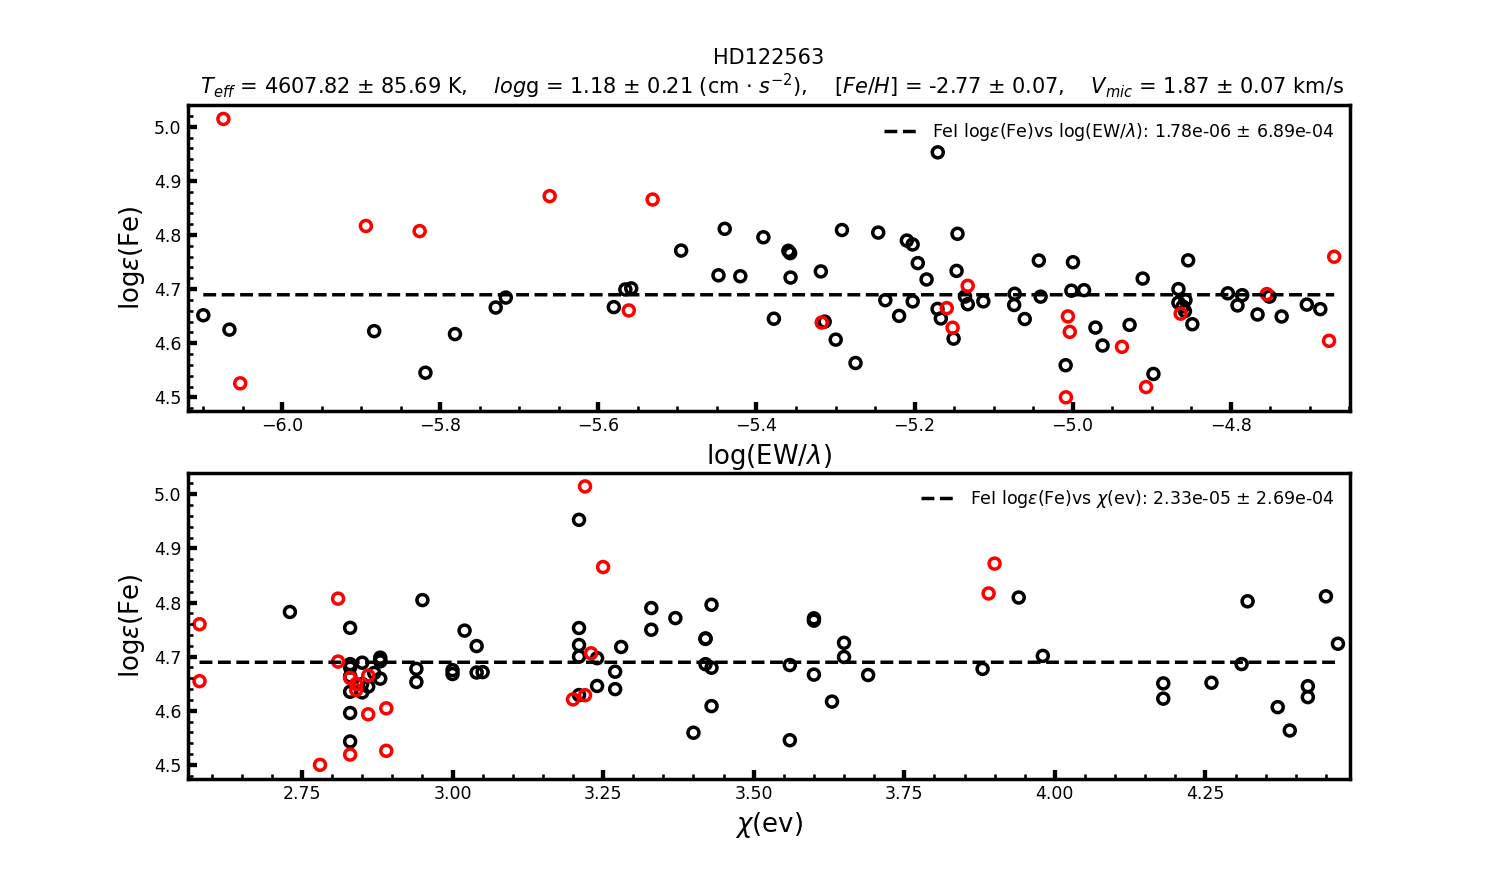

In [7]:
%matplotlib notebook
from lotus_nlte.plot import plot_optimized_equilibrium
import numpy as np
idx_fei = np.where(np.array(mgcog.obs_ele) =="FeI")
idx_feii = np.where(np.array(mgcog.obs_ele) =="FeII")
REWs = np.log10(1e-3*np.array(mgcog.obs_ew)/np.array(mgcog.obs_wavelength))
chis = np.array(mgcog.obs_ep)
fit_pars = [result['dAdREW'], result['dAdchi']]
abunds = de.abunds

fig1 = plot_optimized_equilibrium("HD122563", result['stellarpars'], fit_pars, REWs1=REWs[idx_fei], REWs2=REWs[idx_feii],
                                chis1=chis[idx_fei], chis2=chis[idx_feii], abunds1=abunds[idx_fei],
                                abunds2=abunds[idx_feii])

### Perform slicesampling MCMC to constrain derived stellar parameters

Priors and their estimated uncertainty comes from last step given by differential evolution

In [8]:
import numpy as np
import pymc3 as pm

from lotus_nlte.sampling import slicesampling
trace = slicesampling(de.log_likelihood, mgcog, result['ScipyOptimizeResult'].x, result['ScipyOptimizeResult'].stderrs, de.bounds)
summary = pm.summary(trace, var_names=["Teff", "logg", "vt", 'feh'])
samples = np.vstack([trace[k] for k in ["Teff", "logg", "vt", 'feh']]).T
priors = np.append(result['ScipyOptimizeResult'].x, np.mean(np.array(abunds)[idx_fei]-7.5))
summary

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [log_f]
>Slice: [vt]
>Slice: [logg]
>Slice: [Teff]
Sampling 4 chains: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4800/4800 [15:36<00:00,  5.13draws/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Teff,4607.901299,57.527494,1.178904,4496.620479,4716.454628,2179.654198,1.001032
logg,1.174598,0.174566,0.002933,0.806337,1.501483,3268.420109,0.999964
vt,1.869406,0.051727,0.001060,1.756691,1.962808,2218.177535,1.000786
feh,-2.768153,0.054252,0.001045,-2.869687,-2.662219,2537.737441,1.001092


In corner plot , poterior probablity distributions of each parameter are displayed and blue points show the priors:

<IPython.core.display.Javascript object>


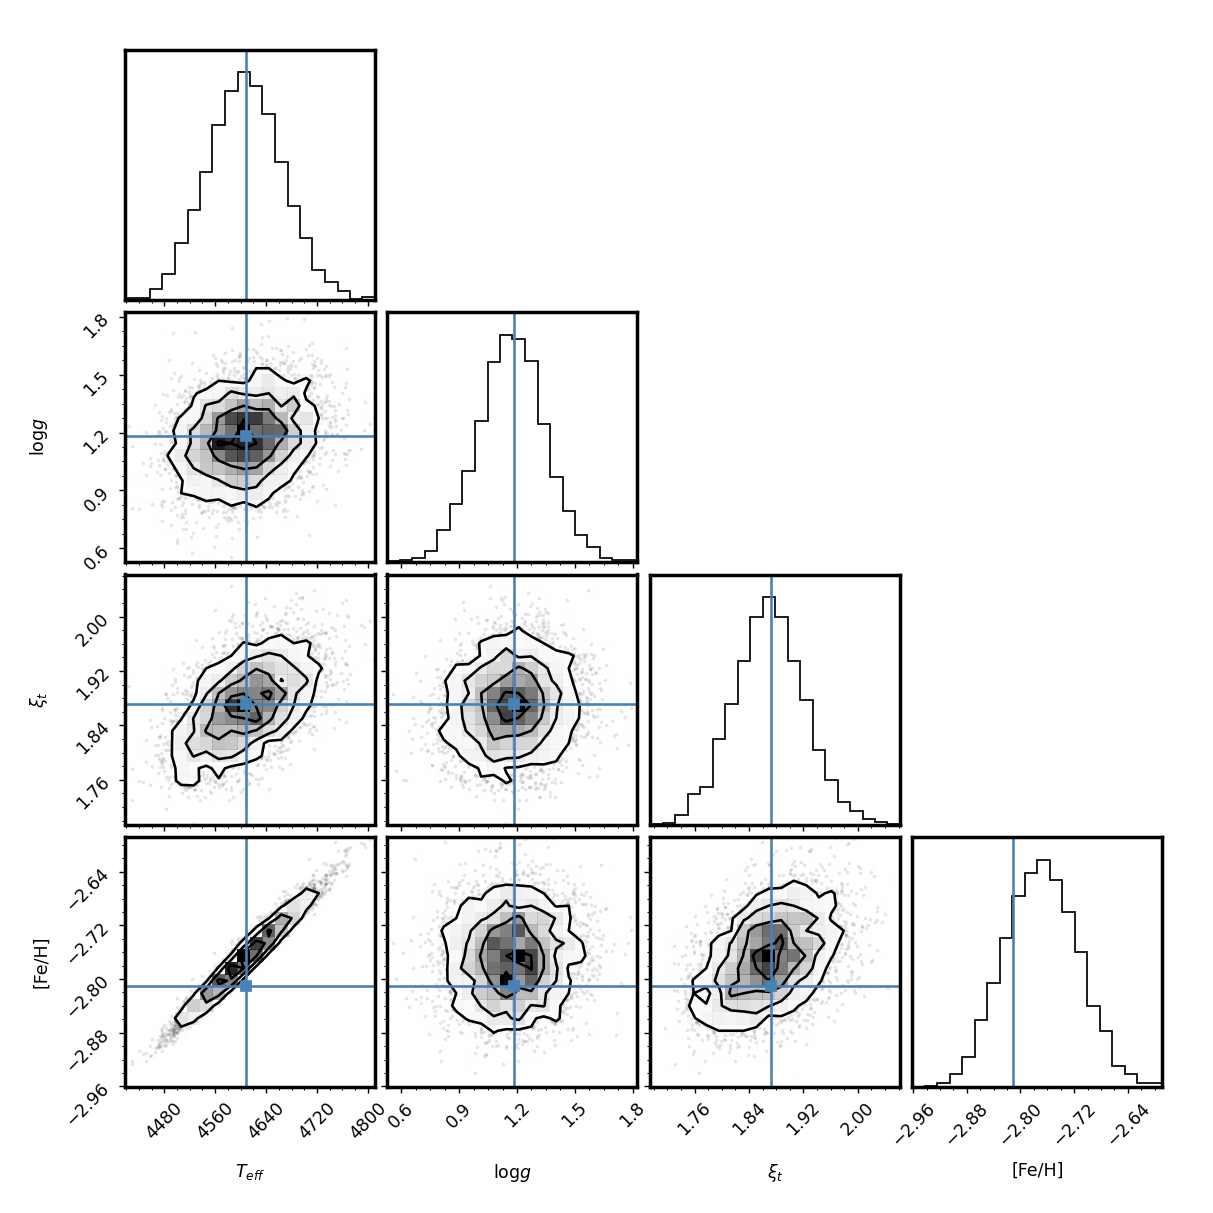

In [9]:
import corner
fig2 = corner.corner(samples, labels=["$T_{eff}$", "log$\mathit{g}$", "$\\xi_t$", '[Fe/H]'], truths=priors)

Collect abundance at the mean of posterios probability of each stellar parameter of certain line:

In [10]:
wavelength = mgcog.obs_wavelength[0]
exp = mgcog.obs_ep[0]
ele = mgcog.obs_ele[0]
ew = mgcog.obs_ew[0]
model = mgcog.models[0]

Teff = summary["mean"]["Teff"]
e_Teff = summary["sd"]["Teff"]
logg = summary["mean"]["logg"]
e_logg = summary["sd"]["logg"]
vt = summary["mean"]["vt"]
e_vt = summary["sd"]["vt"]
abund = de.generate_met(model, Teff, logg, vt, ew)[0] + 7.46#solor iron abundance
print("The abundance of line {0:.2f}A with ep={1:.2f}ev of element {2:s} at Teff={3:.0f}K, logg={4:.2f} and vt={5:.2f}km/s is {6:.2f}".format(wavelength,exp, ele, 
                                                           Teff, logg, vt, abund))

The abundance of line 4058.22A with ep=3.21ev of element FeI at Teff=4608K, logg=1.17 and vt=1.87km/s is 4.95


### Check if the optimal objective function at stellar parameters is close with element-wise minimum of objective function 

In [11]:
best_vals = {
  "Teff": [Teff, e_Teff],
  "logg": [logg, e_logg],
  "Vmic": [vt, e_vt]
}

<IPython.core.display.Javascript object>


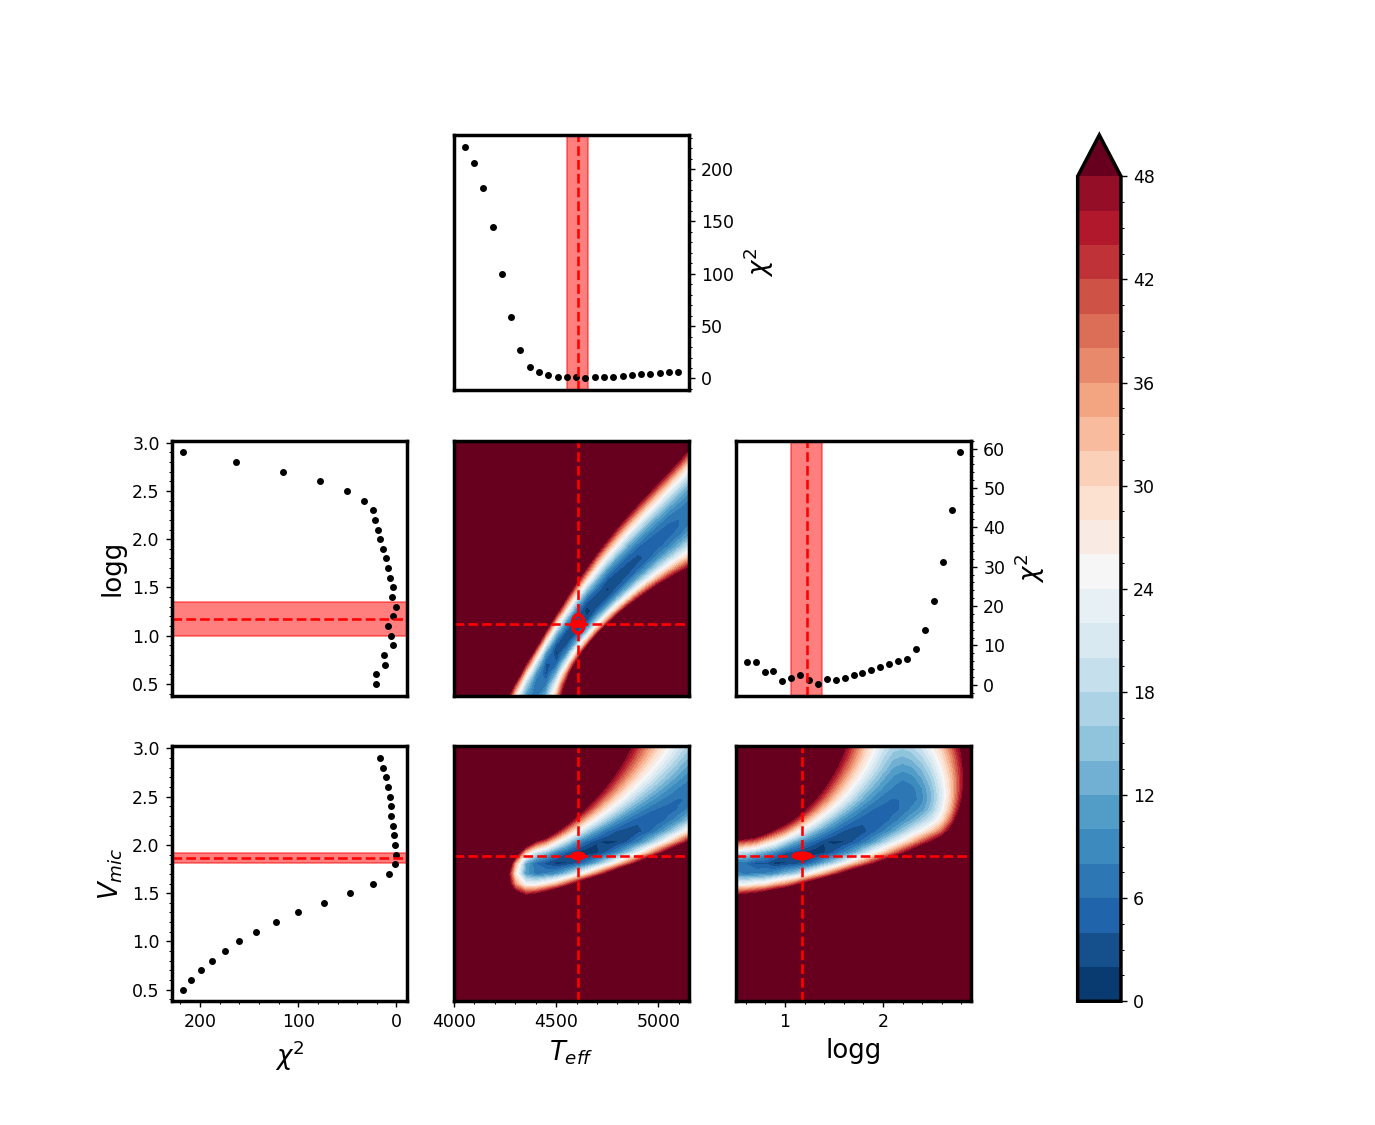

In [12]:
from lotus_nlte.plot import plot_results_brute
de.mgcog = mgcog
grid = de._set_up_meshgrids()
fig3 = plot_results_brute(result=result, grid=grid, best_vals=best_vals)

Looks good!